In [ ]:
#git clone https://github.com/AlexMantilla1/Onchip_CurRefGen.git

In [10]:
from glayout import MappedPDK, sky130, gf180
from glayout import nmos, pmos, multiplier, tapring, via_stack, via_array
from glayout.primitives.fet import __gen_fingers_macro

from glayout.spice.netlist import Netlist
from glayout.routing import c_route, L_route, straight_route

from gdsfactory.cell import cell
from gdsfactory.component import Component, copy
from gdsfactory.components.rectangle import rectangle
from gdsfactory.routing.route_quad import route_quad
from gdsfactory.routing.route_sharp import route_sharp

from glayout.util.comp_utils import (
    align_comp_to_port,
    evaluate_bbox,
    movex,
    movey,
    prec_ref_center,
    prec_array,
)
from glayout.util.port_utils import (
    add_ports_perimeter,
    get_orientation,
    print_ports,
    rename_ports_by_list,
    rename_ports_by_orientation,
    set_port_orientation,
)
from glayout.util.snap_to_grid import component_snap_to_grid
from glayout.placement.common_centroid_ab_ba import common_centroid_ab_ba

from gdsfactory.functions import transformed
from gdsfactory.components import text_freetype
from gdsfactory.components.rectangular_ring import rectangular_ring
from typing import Optional, Union, Literal
import time
import copy
import ipywidgets as widgets
import gdstk
import svgutils.transform as sg
import IPython.display
from IPython.display import clear_output

In [11]:
# Redirect all outputs here
hide = widgets.Output()

def display_gds(gds_file, scale = 3):
  # Generate an SVG image
  top_level_cell = gdstk.read_gds(gds_file).top_level()[0]
  top_level_cell.write_svg('out.svg')
  # Scale the image for displaying
  fig = sg.fromfile('out.svg')
  fig.set_size((str(float(fig.width) * scale), str(float(fig.height) * scale)))
  fig.save('out.svg')

  # Display the image
  IPython.display.display(IPython.display.SVG('out.svg'))

def display_component(component, scale = 3):
  # Save to a GDS file
  with hide:
    component.write_gds("out.gds")
  display_gds('out.gds', scale)

2025-10-31 16:49:54.319 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'via.gds'
/tmp/ipykernel_2950/1481648784.py:10: UserWarning: Unnamed cells, 1 in 'Unnamed_3294de49'
  transistor.write_gds("transistor.gds")
2025-10-31 16:49:54.353 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'transistor.gds'


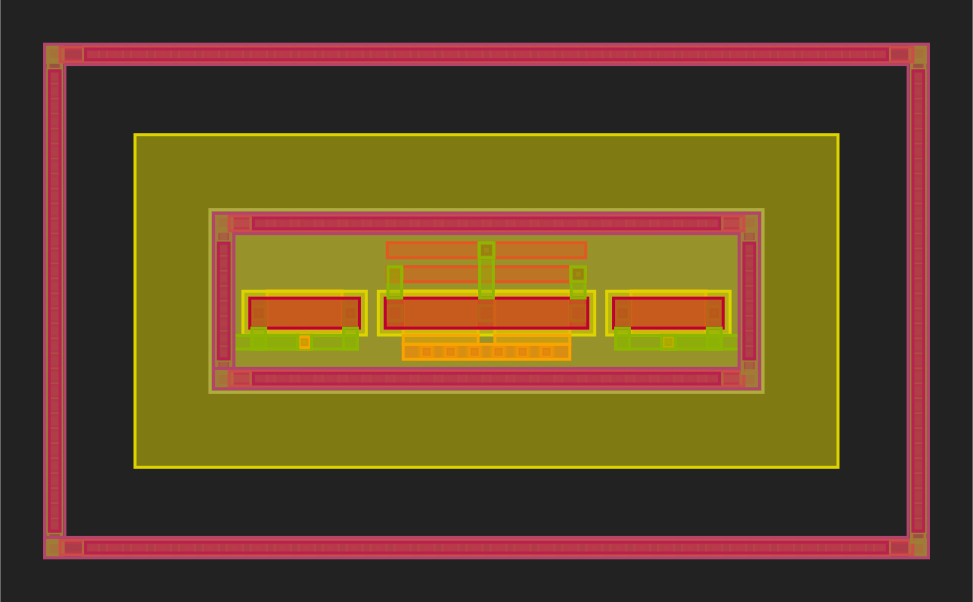

In [9]:
# Generate a via stack
#met2 is the bottom layer. met3 is the top layer.
via = via_stack(gf180, "met2", "met3", centered=True) 

# Generate a transistor
transistor = nmos(gf180, width=1.0, length=2.5, fingers=2)

# Write to GDS
via.write_gds("via.gds")
transistor.write_gds("transistor.gds")
display_component(transistor)